# Setup do ambiente

In [153]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/Projeto1
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Projeto1
linear_regression.ipynb  projeto1.ipynb  studentdata.csv  tecnicasaugmentação.ipynb


# Entendendo os dados

In [154]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

In [155]:
df = pd.read_csv('studentdata.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [156]:
print("Há",df.shape[0],"linhas e ",df.shape[1],"colunas")

Há 2392 linhas e  15 colunas


In [157]:
df.isna().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [158]:
df.duplicated().sum()

0

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [160]:
df['GradeClass'].value_counts()

,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


In [161]:
df[(df['GradeClass'] == 0) & (df['GPA'] < 3.5)].head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2194,3195,15,0,0,2,15.615710,26,0,3,1,0,0,0,1.174610,0.0
2198,3199,16,1,1,3,1.511090,3,0,3,0,0,0,0,2.732661,0.0
2211,3212,17,1,0,2,5.319481,12,0,4,0,1,0,0,2.268851,0.0
2214,3215,16,0,2,1,18.982249,19,0,3,0,0,0,0,1.499702,0.0
2220,3221,18,0,0,1,0.185050,26,0,4,0,0,0,0,0.576403,0.0


In [162]:
def calcular_grade_class(gpa):
  if gpa >= 3.5:
    return 0
  elif 3.0 <= gpa < 3.5:
    return 1
  elif 2.5 <= gpa < 3.0:
    return 2
  elif 2.0 <= gpa < 2.5:
    return 3
  else:
    return 4

df['GradeClass'] = df['GPA'].apply(calcular_grade_class)

df['GradeClass'].value_counts()


,count
GradeClass,
4,1274
3,412
2,385
1,244
0,77


In [163]:
df[(df['GradeClass'] == 0) & (df['GPA'] < 3.5)]


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass


In [164]:
# Separando as colunas em categóricas ou numéricas

numericas = []
categoricas =[]
for i in df.columns:
  if len(df[i].unique()) <= 10:
    categoricas.append(i)
  else:
    numericas.append(i)

print("Colunas Numéricas:",numericas)
print("Colunas Categóricas:",categoricas)

Colunas Numéricas: ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
Colunas Categóricas: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


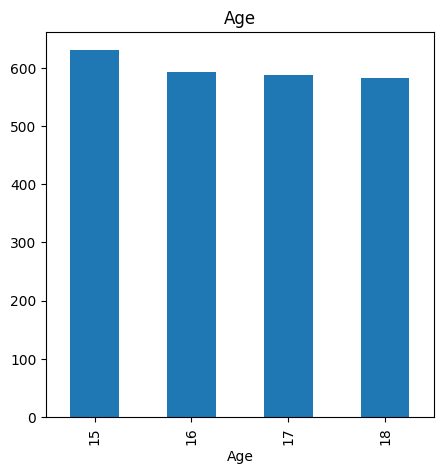

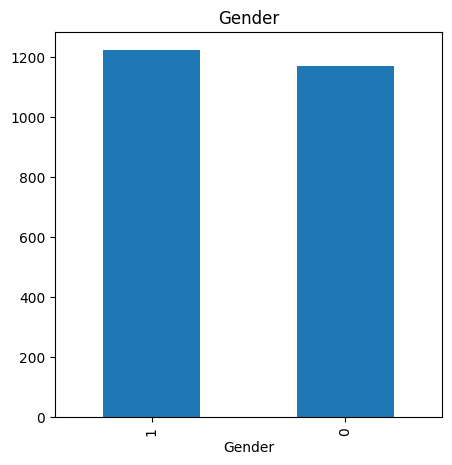

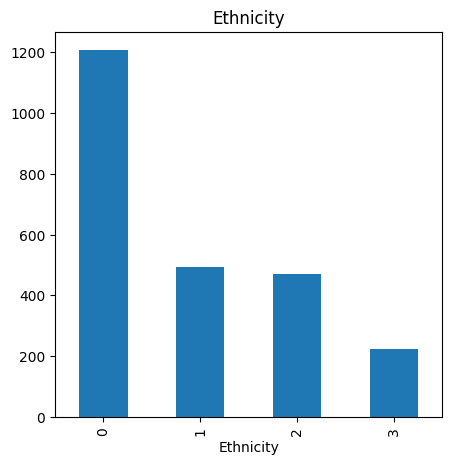

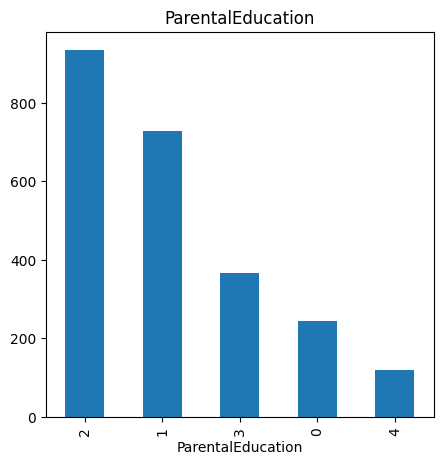

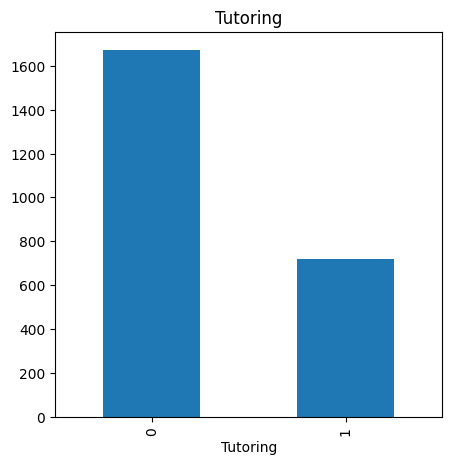

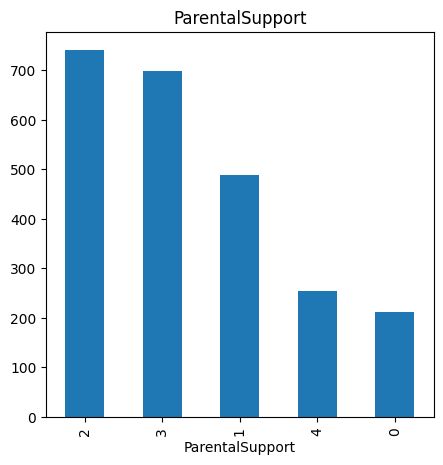

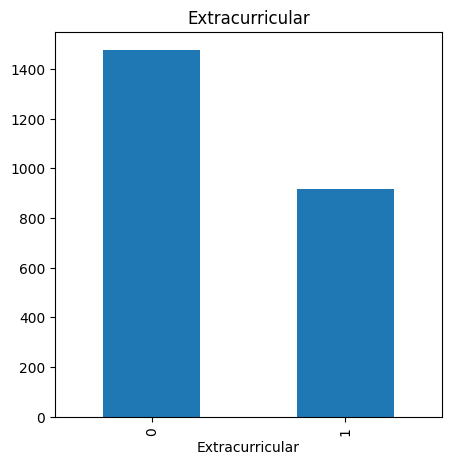

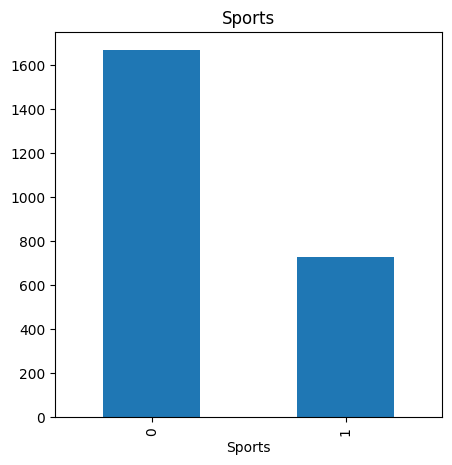

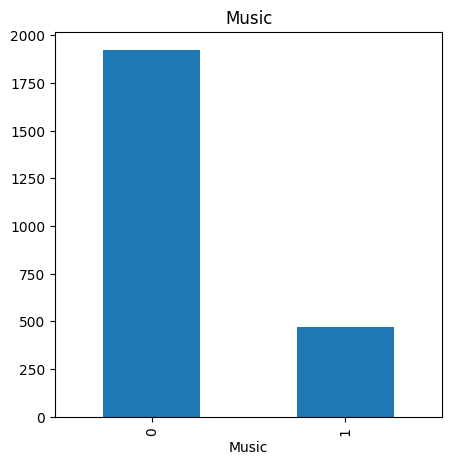

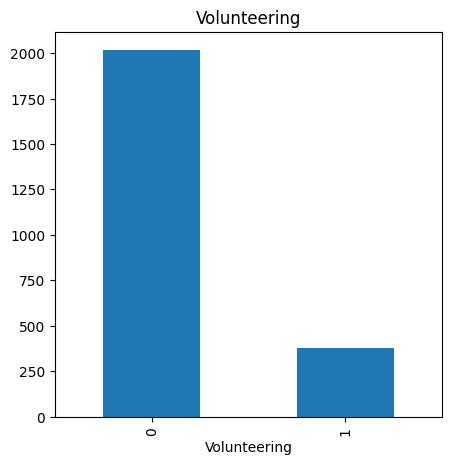

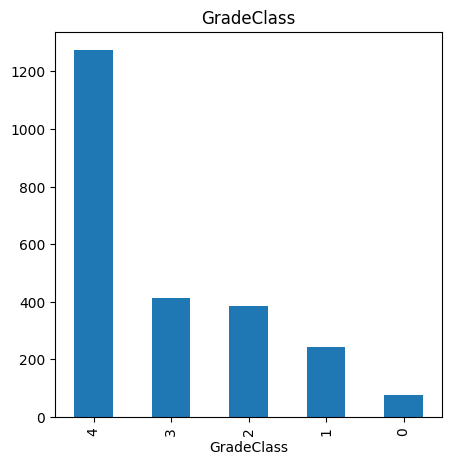

In [165]:
for i in categoricas:
  plt.figure(figsize=(5,5))
  df[i].value_counts().plot(kind='bar')
  plt.title(i)
  plt.show()

* Praticamente todas as colunas, exceto Gênero e Idade, têm desbalanceamento entre as classes.

In [166]:
df[numericas].describe()

,StudentID,StudyTimeWeekly,Absences,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,9.771992,14.541388,1.906186
std,690.655244,5.652774,8.467417,0.915156
min,1001.000000,0.001057,0.000000,0.000000
25%,1598.750000,5.043079,7.000000,1.174803
50%,2196.500000,9.705363,15.000000,1.893393
75%,2794.250000,14.408410,22.000000,2.622216
max,3392.000000,19.978094,29.000000,4.000000


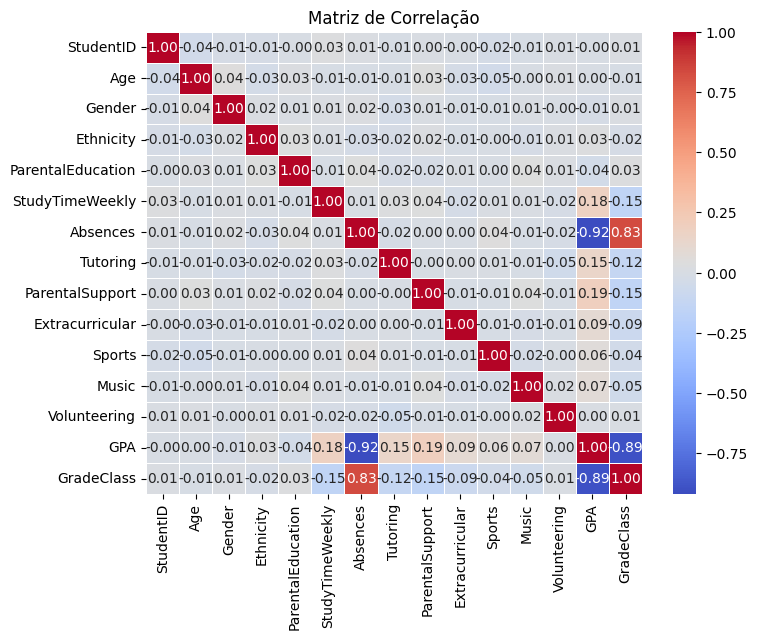

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
corr_matrix = df.corr()

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [168]:
print("Colunas:",df.columns)
print("Colunas Numéricas:",numericas)
print("Colunas Categóricas:",categoricas)

Colunas: Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')
Colunas Numéricas: ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
Colunas Categóricas: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [205]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Supondo que df seja o DataFrame já carregado
# Separar a variável alvo
y = df['GradeClass']

# Separar as features, excluindo a coluna alvo
X = df.drop(columns=['GradeClass'])


In [207]:

# Definindo as colunas categóricas para One-Hot Encoding
categoricas = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Configuração do OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Criando o ColumnTransformer para One-Hot Encoding
ct = ColumnTransformer(
    transformers=[
        ('ohe', ohe, categoricas)
    ], remainder='passthrough'
)

# Ajuste e transformação das features
X_encoded = ct.fit_transform(X)

# Obtendo os nomes das novas colunas
colunas_ohe = ct.named_transformers_['ohe'].get_feature_names_out(categoricas)

# Pegando os nomes das colunas numéricas
colunas_numericas = [col for col in X.columns if col not in categoricas]

# Criando um DataFrame com os resultados
df_encoded_df = pd.DataFrame(X_encoded, columns=list(colunas_ohe) + colunas_numericas)


In [208]:

colunas_smote = list(df_encoded_df.columns)  # Inclua todas as colunas após o One-Hot Encoding

# Crie um DataFrame com as colunas para SMOTE e o alvo
X_smote = df_encoded_df.copy()  # Inclua todas as colunas após o One-Hot Encoding
X_smote['GradeClass'] = y

# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_smote_resampled, y_resampled = smote.fit_resample(X_smote, y)

# Adicionar os dados balanceados de volta ao DataFrame
df_smote_resampled = pd.DataFrame(X_smote_resampled, columns=X_smote.columns)
df_smote_resampled['GradeClass'] = y_resampled



In [209]:
# Dividindo os dados em treinamento e teste
X_final = df_smote_resampled.drop('GradeClass', axis=1)
y_final = df_smote_resampled['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

# Aplicando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [210]:

# Treinando um modelo de classificação (Regressão Logística)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo: 0.96

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       378
           1       0.97      0.95      0.96       367
           2       0.95      0.95      0.95       384
           3       0.94      0.97      0.95       398
           4       0.99      0.95      0.97       384

    accuracy                           0.96      1911
   macro avg       0.97      0.96      0.96      1911
weighted avg       0.96      0.96      0.96      1911



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
